# Teorém o přenosu maximálního výkonu

Mám dělič složený ze dvou odporů: $R_i$ (vnitřní odpor zdroje) a $R_z$ (odpor zátěže). Otázka zní při jaké hodnotě $R_z$ bude do zátěže přeneseno nejvíce výkonu?

## Výkon na zátěži popisuje tato rovnice:
$$ P = U_z \cdot I = U_i \cdot I \cdot \frac{R_z}{R_i + R_z} = U_i^2 \cdot \frac{R_z}{(R_i + R_z)^2} $$

Derivace podílu:
$$ \left(\frac{f(x)}{g(x)}\right)^\prime=\frac{f^\prime(x)\cdot g(x) - f(x)\cdot g^\prime(x)}{g^2(x)} $$

In [33]:
import sympy as sp
import numpy as np
from IPython.display import display, Markdown, Math
from matplotlib import pyplot as plt
from engineering_notation import EngNumber

def scalar_sym(number, name: str = None, unit: str = None) -> None:
    name = '' if name is None else f'{name} ='
    unit = '' if unit is None else f'~{unit}'
    display(Math(f'{name}{sp.latex(number)}{unit}'))

In [34]:
Ui = sp.Symbol('U_i')
Ri = sp.Symbol('R_i')
Rz = sp.Symbol('R_z')

P = Ui**2 * Rz / (Ri+Rz)**2
scalar_sym(P, 'P')

<IPython.core.display.Math object>

In [35]:
dP = sp.diff(P, Rz)
scalar_sym(dP, '\\frac{\\partial P}{\\partial R_z}')

<IPython.core.display.Math object>

In [36]:
eq1 = sp.Eq(dP)
scalar_sym(eq1, '\\frac{\\partial P}{\\partial R_z}')

<IPython.core.display.Math object>

## Porovnáním parciální derivace s nulou najdeme maxima výkonu

In [41]:
sp.solve(eq1)

[{R_i: R_z}, {U_i: 0}]

## Závěr
Pokud se $R_i = R_z$ je přenášen maximální výkon.

In [46]:
scalar_sym(P.subs(Ri, Rz), 'P_{max}')

<IPython.core.display.Math object>

## Ukázka závislosti výkonu na zatěžovacím odporu

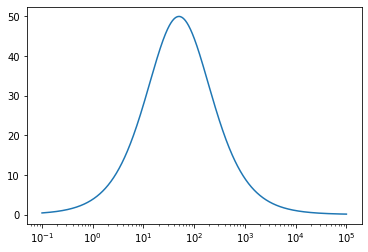

In [59]:
Ui = 100 # V
Ri = 50 # Ω
Rz = np.logspace(-1,5, 1000)
P = Rz * Ui**2 / (Rz + Ri)**2
plt.semilogx(Rz, P)
plt.show()